## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
awesome.gif
data.db
im
im.db
im.db.zip
im_db.zip
im_db_folder
movie_data_erd.jpeg
student.ipynb
zippedData


In [2]:
#changing directories to access the unzipped SQL database
%cd im_db_folder

C:\Users\joelm\Desktop\Flatiron School\Phase 1\Phase 1 Project\dsc-phase-1-project-v2-4\dsc-phase-1-project-v2-4\im_db_folder


In [3]:
!ls

ROI_csv.csv
average action film ROI per month.png
average adventure film ROI per month.png
average animation film ROI per month.png
average biography film ROI per month.png
average comedy film ROI per month.png
average crime film ROI per month.png
average documentary ROI per month.png
average drama film ROI per month.png
average horror film ROI per month.png
average_ROI_per_genre.png
average_ROI_per_month.png
bom.movie_gross.csv.gz
df_csv_budgets.csv
im.db
tn.movie_budgets.csv.gz


In [4]:
import sqlite3
import pandas as pd

In [5]:
conn = sqlite3.connect("im.db")
print(conn)

In [6]:
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,budget_and_gross
9,ROI


In [7]:
pd.read_sql("""SELECT * FROM movie_basics;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Since my proposal focuses on return on investment, I'll use this budgets CSV, 
which also shows worldwide gross:

In [8]:
df_csv_budgets = pd.read_csv('tn.movie_budgets.csv.gz', encoding='latin-1')
df_csv_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
#Gathering some basic info on this file:
df_csv_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
df_csv_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

I need integers, not strings, so I Googled how to get rid of those dollar signs and then convert
the columns into integers. (source: https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas)

In [11]:
df_csv_budgets['production_budget'] = df_csv_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_csv_budgets['domestic_gross'] = df_csv_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df_csv_budgets['worldwide_gross'] = df_csv_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [12]:
#Adding an ROI column that subtracts a film's budget from its worldwide gross:
df_csv_budgets['ROI'] = df_csv_budgets['worldwide_gross'] - df_csv_budgets['production_budget']
#Changing 'movie' column name to 'title' to match the movie info dataframe from SQL below 
# ('title' is the better name, anyway):
df_csv_budgets.rename(columns = {'movie': 'title'}, inplace = True)
df_csv_budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.344950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03


Let's see if I can clean up the finance columns (stripping the dollar signs comes from this source: https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-pandas-aggregation-results)

In [13]:
df_csv_budgets['production_budget'] = df_csv_budgets['production_budget'].astype(int)
df_csv_budgets['domestic_gross'] = df_csv_budgets['domestic_gross'].astype(int)
df_csv_budgets['worldwide_gross'] = df_csv_budgets['worldwide_gross'].astype(int)

In [14]:
#Getting rid of scientific notation in the ROI column:
pd.options.display.float_format = '{:.0f}'.format
print(df_csv_budgets['title'].head(100).to_string())

0                                                Avatar
1           Pirates of the Caribbean: On Stranger Tides
2                                          Dark Phoenix
3                               Avengers: Age of Ultron
4                     Star Wars Ep. VIII: The Last Jedi
5                  Star Wars Ep. VII: The Force Awakens
6                                Avengers: Infinity War
7         Pirates of the Caribbean: At WorldÃ¢ÂÂs End
8                                        Justice League
9                                               Spectre
10                                The Dark Knight Rises
11                              Solo: A Star Wars Story
12                                      The Lone Ranger
13                                          John Carter
14                                              Tangled
15                                         Spider-Man 3
16                           Captain America: Civil War
17                   Batman v Superman: Dawn of 

It looks like this weird â figure is popping up instead of an apostrophe, so I'll replace it:

In [15]:
#df_csv_budgets.replace("â", "'", regex=True)
#df_csv_budgets['movie'].str.encode('ascii', 'ignore').str.decode('ascii')
#df_csv_budgets['movie'].str.replace("â□□", "'", regex=True)
#df_csv_budgets['movie'].apply(lambda x: x.replace("â□□", "'"))
#df_csv_budgets['movie'].apply(lambda x: x.replace("â��", "'"))
#df_csv_budgets['movie'].apply(lambda x: x.replace("Ã¢Â□Â□", "'"))

Wow, this is not working and I've spent a while on it. It looks like 1.7% of titles
are effected by this special character issue (100 rows out of 5,782 total), so dropping them in the 
interest of time is probably the way to go.

In [16]:
#df_csv_budgets = df_csv_budgets.drop([7, 27, 91, 167, 175, 197, 262, 279, 309, 311, 329, 405, 501, 579, 627,\
#                                     1044, 1087, 1128, 1339, 1348, 1367, 1368, 1371, 1380, 1455, 1529,\
#                                     1537, 1702, 1823, 1829, 1864, 1935, 2118, 2130, 2168, 2185, 2225, 2226,\
#                                     2323, 2369, 2395, 2398, 2450, 2453, 2508, 2516, 2530, 2606, 2676, 2694,\
#                                     2701, 2719, 2737, 2756, 2761, 2868, 2928, 2949, 2984, 2996, 3013, 3139,\
#                                     3300, 3463, 3530, 3538, 3562, 3566, 3661, 3911, 4076, 4081, 4129, 4156,\
#                                     4172, 4226, 4238, 4267, 4284, 4304, 4307, 4319, 4331, 4335, 4401, 4586,\
#                                     4660, 4695, 4708, 4756, 4812, 4855, 4987, 5033, 5295, 5367, 5409, 5659,\
#                                     5707], axis=0)

Now that the budget/ROI CSV has been cleaned up, let's combine everything I want from
the SQL database and turn that into a DataFrame as well.

In [17]:
movie_info_df = pd.read_sql("""
SELECT
    movie_basics.movie_id,
    movie_basics.primary_title AS title,
    movie_basics.genres,
    persons.primary_name AS director
FROM movie_basics
JOIN directors
    USING(movie_id)
JOIN persons
    USING(person_id)
GROUP BY movie_basics.primary_title;
""", conn)

movie_info_df.head()

,movie_id,title,genres,director
0,tt1699720,!Women Art Revolution,Documentary,Lynn Hershman-Leeson
1,tt2346170,#1 Serial Killer,Horror,Stanley Yung
2,tt3120962,#5,"Biography,Comedy,Fantasy",Ricky Bardy
3,tt4470336,#50Fathers,Comedy,Joddy Eric Matthews
4,tt5255986,#66,Action,Asun Mawardi


Now I'll combine the IMDb dataset with my budget dataframe:

In [18]:
df = df_csv_budgets.merge(movie_info_df, on='title', how='left')
df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,ROI,movie_id,genres,director
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,2351345279,tt1775309,Horror,Atsushi Wada
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,"Action,Adventure,Fantasy",Rob Marshall
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,"Action,Adventure,Sci-Fi",Simon Kinberg
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,"Action,Adventure,Sci-Fi",Joss Whedon
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,tt7837402,"Horror,Sci-Fi,Thriller",Robert Rodriguez
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,tt2107644,"Drama,Horror,Thriller",Benjamin Roberds


Dropping some unnecessary rows:

In [19]:
df = df.drop(['id', 'domestic_gross','worldwide_gross', 'movie_id'], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   title              5782 non-null   object 
 2   production_budget  5782 non-null   int32  
 3   ROI                5782 non-null   float64
 4   genres             2350 non-null   object 
 5   director           2362 non-null   object 
dtypes: float64(1), int32(1), object(4)
memory usage: 293.6+ KB


In [21]:
print(df.head(100).to_string())

    release_date                                                           title  production_budget        ROI                      genres             director
0   Dec 18, 2009                                                          Avatar          425000000 2351345279                      Horror         Atsushi Wada
1   May 20, 2011                     Pirates of the Caribbean: On Stranger Tides          410600000  635063875    Action,Adventure,Fantasy         Rob Marshall
2    Jun 7, 2019                                                    Dark Phoenix          350000000 -200237650     Action,Adventure,Sci-Fi        Simon Kinberg
3    May 1, 2015                                         Avengers: Age of Ultron          330600000 1072413963     Action,Adventure,Sci-Fi          Joss Whedon
4   Dec 15, 2017                               Star Wars Ep. VIII: The Last Jedi          317000000  999721747                         NaN                  NaN
5   Dec 18, 2015                        

Ok, over half of the movies in the merged df are missing the IMDb df info. I'm guessing it has
 to do with title spelling discrepancies. I see the first movie with these missing 
 values is "Star Wars Ep. VIII: The Last Jedi," which is followed by another Star Wars
 movie. 
 
 With all the different Star Wars "episodes" and "sidequels," maybe
 there's a common spelling mismtach going on. So, below, I search the IMDb df for any
 records where the string "Star Wars" appears in order to see title spelling differences.

In [22]:
movie_info_df[movie_info_df["title"].str.contains("Star Wars")]

,movie_id,title,genres,director
19838,tt6522426,Call of the Jedi: A Star Wars Story,Sci-Fi,McClain Nicholas High
36548,tt9129500,Fall of Lotus: A Star Wars Story,"Action,Adventure,Fantasy",Tarik Hatipoglu
39187,tt4401260,Forsaken: A Star Wars Fan Film,"Adventure,Fantasy,Sci-Fi",John Dondero
83122,tt3648510,Plastic Galaxy: The Story of Star Wars Toys,"Documentary,History,Sci-Fi",Brian Stillman
89315,tt3748528,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",Gareth Edwards
96542,tt3778644,Solo: A Star Wars Story,"Action,Adventure,Fantasy",Ron Howard
98190,tt4644286,Star Wars Begins: A Filmumentary,Documentary,Jamie Benning
98191,tt6682462,Star Wars FanFilm the Padawan I 'The Beginning',Sci-Fi,Mark Bray
98192,tt7753242,Star Wars Night at the Highball,Music,Kevin Neece
98193,tt10239898,Star Wars: Battle for the Holocrons,"Action,Adventure,Fantasy",Carlos Michael Hagene


Yep, in the merged df it's "Star Wars Ep." plus a roman numeral, a colon, and then
 the episode name. In the IMDb df, it's just "Star Wars" followed by a colon and the name. 
 I could go through and replace all "Ep. I-IX:" strings with just a colon and restore
 nine of...3,333 missing values, but this doesn't seem like a time-effective strategy overall.

Looking at more titles in the merged df with NaN's and then searching for them in the 
 IMDb df, I notice that they usually deal with franchises (Harry Potter, Spider-Man/Spider Man,
 Rush Hour 1-3, etc.) Perhaps it wouldn't be all too uncouth to drop the NaNs since sequels
 really just build on the first film's success or preexisting franchise (Harry Potter and Lord 
 of the Rings books, for example). Therefore, sequel ROIs don't reflect an emerging film studio's
 expected ROI when they're starting out. Other merged df movies with IMDb NaNs are simply missing 
 from the IMDb df (oddly enough, WALL-E and 2012). I suppose I could enter some in manually, 
 but again, I'd spend maybe an hour adding 100 records or so. It'd probaby take days to fill 
 everything in.

Suffice it to say, given the project description asking me to navigate a line between
 20-40 hours and the fact that I still have 2,350 records here, I can probably just drop the NaNs and
 move on with a reasonable dataset.

In [23]:
#Dropping records with null values:
df = df.dropna()

In [24]:
#Resetting the index:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              2350 non-null   int64  
 1   release_date       2350 non-null   object 
 2   title              2350 non-null   object 
 3   production_budget  2350 non-null   int32  
 4   ROI                2350 non-null   float64
 5   genres             2350 non-null   object 
 6   director           2350 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 119.5+ KB


In [25]:
df.drop(['index'], axis=1, inplace=True)

In [26]:
#df.drop(['level_0'], axis=1, inplace=True)
#df

Ok, we have a non-null df of 2,350 movies with the info we want. One last thing to consider
 is all the multi-genre listings. Let's see just how many different genre categorizations 
 appear here:

In [27]:
print(df['genres'].value_counts().to_string())

Drama                              196
Documentary                         98
Comedy                              83
Comedy,Drama                        73
Adventure,Animation,Comedy          68
Comedy,Drama,Romance                66
Drama,Romance                       60
Action,Adventure,Sci-Fi             57
Horror                              50
Action,Crime,Drama                  48
Comedy,Romance                      45
Drama,Thriller                      41
Action,Adventure,Fantasy            40
Horror,Thriller                     39
Horror,Mystery,Thriller             36
Action,Comedy,Crime                 33
Thriller                            32
Action,Adventure,Comedy             31
Action,Adventure,Drama              31
Crime,Drama,Thriller                28
Action,Crime,Thriller               25
Biography,Drama,History             24
Crime,Drama                         23
Action,Thriller                     22
Biography,Comedy,Drama              20
Biography,Drama          

Wow, 294 different genre listings, with a bunch of movies having a unique genre listing.
  ╰（‵□′）╯
Well, I can come back to the genre issue in a minute. For now, let's focus on the main issue: ROI.
 It's probably a good idea to focus on movies with larger budgets, let's see how the budgets break down:

In [28]:
budgets = df['production_budget'].value_counts().sort_index()
print(budgets.to_string())

1400          1
7000          1
9000          1
10000         2
15000         1
17300         1
20000         2
22000         1
25000         4
27000         1
30000         2
35000         2
40000         2
42000         1
45000         1
50000         7
55000         1
60000         3
70000         1
75000         2
100000       10
110000        1
114000        1
120000        1
125000        3
135000        1
150000        3
160000        1
170000        1
175000        3
180000        1
190000        1
200000       12
225000        1
250000       21
270000        1
290000        1
300000        9
325000        1
350000        2
400000        5
420000        1
450000        4
500000       30
546173        1
550000        2
558000        1
560000        2
600000        6
625000        1
650000        3
672000        1
700000        2
750000        6
800000        3
850000        3
858000        1
900000        7
913000        1
916000        1
930000        1
950000        4
1000000 

It turns out the average successful mainstream movie has a production budget of 65 million
 plus another 35 million for marketing, so around 100 million total! However, if I just
 include movies with that kind of budget, I only have 256 records. 
 
 I need a lot more than that,
 so maybe I can still find meaningful ROI patterns in movies with, say, 2.5 million and up
 budgets and still have almost 2,000 records. (Source for what a small budget is: https://topsheet.io/blog/basics-to-making-a-low-budget-film)

In [29]:
filtered_df = df[df['production_budget'] >= 2500000]
filtered_df

,release_date,title,production_budget,ROI,genres,director
0,"Dec 18, 2009",Avatar,425000000,2351345279,Horror,Atsushi Wada
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,635063875,"Action,Adventure,Fantasy",Rob Marshall
2,"Jun 7, 2019",Dark Phoenix,350000000,-200237650,"Action,Adventure,Sci-Fi",Simon Kinberg
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1072413963,"Action,Adventure,Sci-Fi",Joss Whedon
4,"Apr 27, 2018",Avengers: Infinity War,300000000,1748134200,"Action,Adventure,Sci-Fi",Anthony Russo
...,...,...,...,...,...,...
1944,"Dec 31, 2010",Christmas Mail,2500000,-2500000,"Comedy,Drama,Family",John Murlowski
1945,"Jul 3, 2015",Stung,2500000,-2500000,"Action,Adventure,Comedy",Benni Diez
1946,"Oct 13, 2015",8 Days,2500000,-2500000,"Drama,Thriller",Jaco Booyens
1947,"Sep 2, 2016",Antibirth,2500000,-2500000,Horror,Danny Perez


Now let's see how these films' budgets are distributed. Specifically, what's the big picture when it comes to budget and ROI in here?

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline

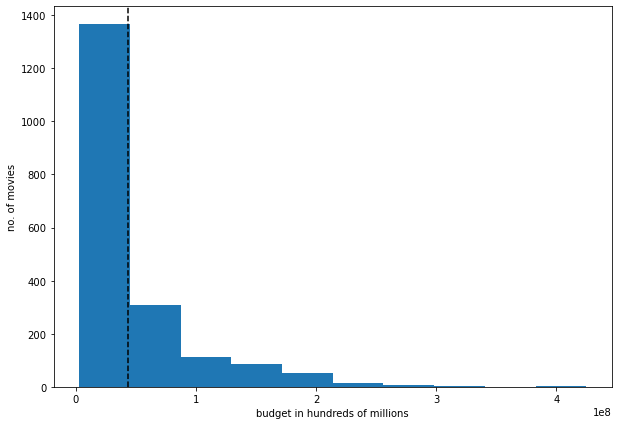

In [31]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(filtered_df['production_budget'])
plt.xlabel('budget in hundreds of millions')
plt.ylabel('no. of movies')
plt.axvline(filtered_df['production_budget'].mean(), color='k', linestyle='dashed');

In [32]:
filtered_df['production_budget'].mean()

43286236.6772704

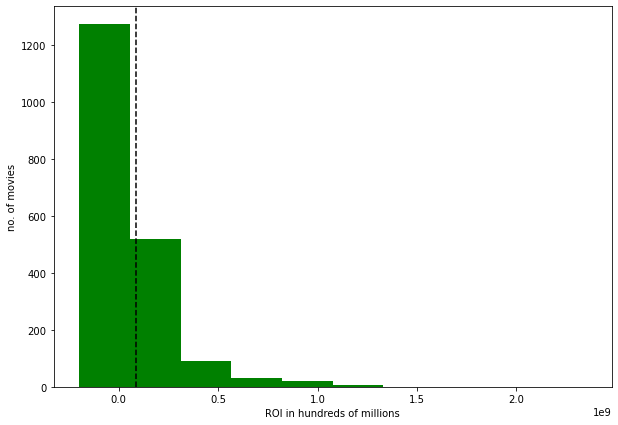

In [33]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(filtered_df['ROI'], color='g')
plt.xlabel('ROI in hundreds of millions')
plt.ylabel('no. of movies')
plt.axvline(filtered_df['ROI'].mean(), color='k', linestyle='dashed');

In [34]:
filtered_df['ROI'].mean()

87053065.38840431

It looks like most of these films have budgets near or under 50 million, so that means that 
 maybe the whole 100+ million budget thing isn't quite as common as I saw on Google, so 
 let's proceed with the filtered_df. Now the next thing is to convert the date column from
 strings with text months to datetime:

In [35]:
from datetime import datetime
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])

<ipython-input-35-0d156d81541c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])


In [38]:
filtered_df['release_date'] = pd.DatetimeIndex(filtered_df['release_date']).month

<ipython-input-38-f1fea1dbbcd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_date'] = pd.DatetimeIndex(filtered_df['release_date']).month


In [39]:
filtered_df.rename(columns = {'release_date': 'release_month'}, inplace = True)
filtered_df

C:\Users\joelm\anaconda3again\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,release_month,title,production_budget,ROI,genres,director
0,12,Avatar,425000000,2351345279,Horror,Atsushi Wada
1,5,Pirates of the Caribbean: On Stranger Tides,410600000,635063875,"Action,Adventure,Fantasy",Rob Marshall
2,6,Dark Phoenix,350000000,-200237650,"Action,Adventure,Sci-Fi",Simon Kinberg
3,5,Avengers: Age of Ultron,330600000,1072413963,"Action,Adventure,Sci-Fi",Joss Whedon
4,4,Avengers: Infinity War,300000000,1748134200,"Action,Adventure,Sci-Fi",Anthony Russo
...,...,...,...,...,...,...
1944,12,Christmas Mail,2500000,-2500000,"Comedy,Drama,Family",John Murlowski
1945,7,Stung,2500000,-2500000,"Action,Adventure,Comedy",Benni Diez
1946,10,8 Days,2500000,-2500000,"Drama,Thriller",Jaco Booyens
1947,9,Antibirth,2500000,-2500000,Horror,Danny Perez


Ok, now let's look for some basic trends and perform some EDA:

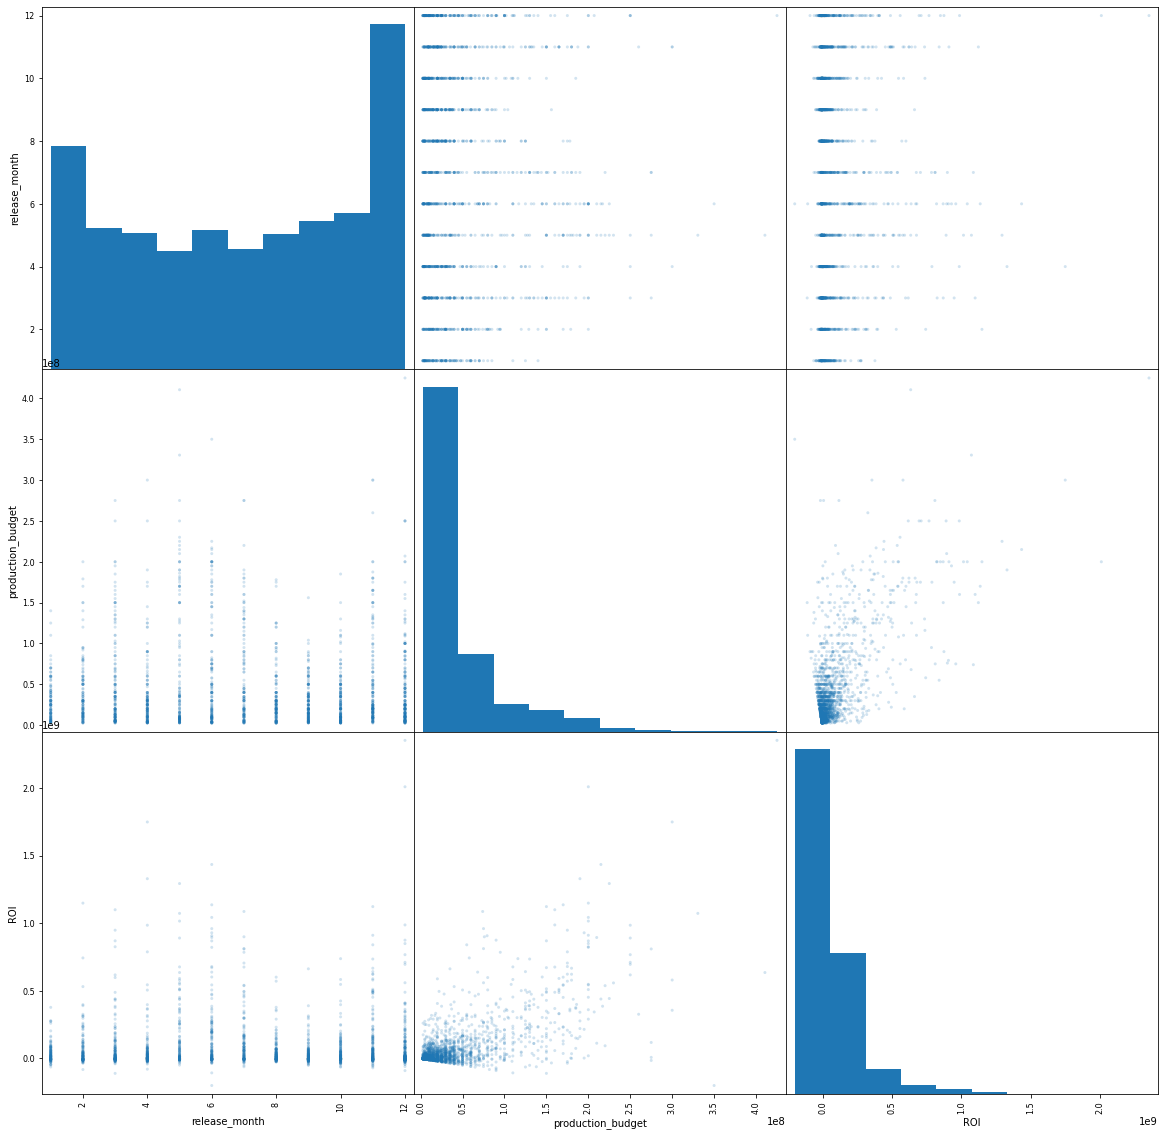

In [40]:
pd.plotting.scatter_matrix(filtered_df, alpha=0.2, figsize=(20,20));

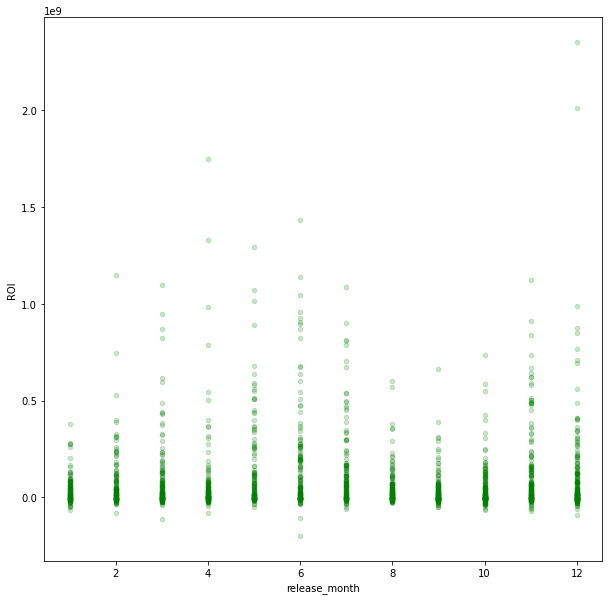

In [41]:
filtered_df.plot.scatter(x='release_month', y='ROI', c='g', alpha=0.2, figsize=(10,10));

How dense are each of these months release-wise?

In [42]:
filtered_df['release_month'].value_counts()

12    220
11    184
10    183
9     174
3     165
6     163
4     160
8     159
7     141
5     139
2     135
1     126
Name: release_month, dtype: int64

It looks like the higher ROIs tend to be earned in November-December and April-July.
 The November-December part isn't too surpising since more movies are released then
 than any other months (although it's interesting that October is one release behind 
 and yet one of the lower-ROI-earning months). 
 
 It's also noteworthy how April-July
 are in the middle of the pack as far as amount of releases go, yet still seem
 to be higher ROI-earners. I guess this lends credence to the "summer blockbusters"
 saying (although April-May aren't really summer months and then there's a steep
 drop-off in August). 

Let's see if I can get numbers on average-ROI-per-month to back this up with some 
 more specifics. I have to think this one out, I want to take the total ROI of each 
 month's movies and divide it by the number of releases that month.

In [43]:
avg_monthly_ROI = filtered_df.groupby('release_month').mean().sort_values('release_month').reset_index()

#Now I need to convert those months as integers into month names for my visualization:

#avg_monthly_ROI['release_month'].dt.strptime(month_number, "%m")
#avg_monthly_ROI['release_month'].to_datetime(unit='m')
#pd.to_datetime(avg_monthly_ROI['release_month'], unit='%b')

#This is taking too long, let's map a dictionary onto it:

month_mapping = {
    1: "Jan.",
    2: "Feb.",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "Aug.",
    9: "Sept.",
    10: "Oct.",
    11: "Nov.",
    12: "Dec."
}

In [44]:
avg_monthly_ROI['release_month'] = avg_monthly_ROI['release_month'].map(month_mapping)

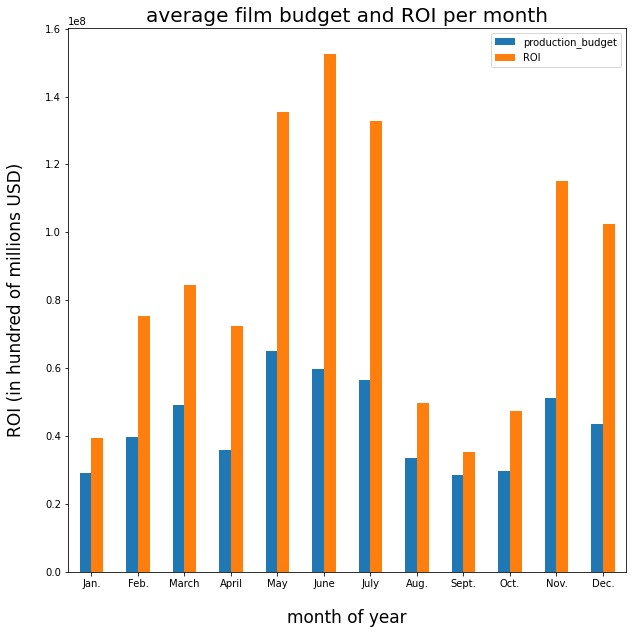

In [45]:
avg_monthly_ROI.plot(x='release_month', kind='bar', figsize=(10,10))
plt.title('average film budget and ROI per month', fontsize=20)
plt.xlabel('month of year', labelpad=20, fontsize=17)
plt.ylabel('ROI (in hundred of millions USD)', labelpad=20, fontsize=17)
plt.xticks(rotation = 0)
plt.savefig('average_ROI_per_month.png');

This shows how even though April stood out a bit on the green scatter plot above, it
 doesn't have quite the same overall ROI-earnings that May-July have. 

In any case, this is a good start. 
 It also begs further questions: simply releasing a movie in June doesn't guarantee a 
 robust ROI. Why exactly do these May-July movies tend to be more successful ROI-wise? This sounds 
 like a good time to get back into the whole genre debacle as well as writers & directors.

Let's tackle genre first: back where we left it, we realized there are
 294 unique genre descriptions. That's WAY too many to expect a corporate executive to 
 care about, so we definitely need to condense them, but how?

Let's get a refresher on how they break down:

In [46]:
print(df['genres'].value_counts().to_string())

Drama                              196
Documentary                         98
Comedy                              83
Comedy,Drama                        73
Adventure,Animation,Comedy          68
Comedy,Drama,Romance                66
Drama,Romance                       60
Action,Adventure,Sci-Fi             57
Horror                              50
Action,Crime,Drama                  48
Comedy,Romance                      45
Drama,Thriller                      41
Action,Adventure,Fantasy            40
Horror,Thriller                     39
Horror,Mystery,Thriller             36
Action,Comedy,Crime                 33
Thriller                            32
Action,Adventure,Comedy             31
Action,Adventure,Drama              31
Crime,Drama,Thriller                28
Action,Crime,Thriller               25
Biography,Drama,History             24
Crime,Drama                         23
Action,Thriller                     22
Biography,Comedy,Drama              20
Biography,Drama          

That's a lot of genres. On one hand, I don't want to condense them too broadly and essentially 
 lose data, but on the other hand, it's still over ten times the amount of genres anyone
 needs. Maybe we should condense multi-labelled genres down to their first label. Before that,
 let's see how accurate these labels are:

In [47]:
#filtered_df.loc[filtered_df['genres'].str.contains('Action', regex=True)]
#filtered_df.loc[filtered_df['genres'].str.contains('Animation', regex=True)]
filtered_df.loc[filtered_df['genres'].str.contains('Documentary', regex=True)]

,release_month,title,production_budget,ROI,genres,director
199,6,The Patriot,110000000,105300000,Documentary,Daniel Sivan
214,5,Gladiator,103000000,354683805,"Documentary,Thriller",Laura Clarke
226,11,End of Days,100000000,112026975,"Comedy,Documentary,Drama",Christoffer Dreyer
258,7,Contact,90000000,75900000,"Documentary,History",Bentley Dean
292,2,Jumper,82500000,140140812,"Biography,Documentary,Drama",Phil Giordano
...,...,...,...,...,...,...
1929,4,"Fat, Sick & Nearly Dead",2600000,-2600000,Documentary,Kurt Engfehr
1931,7,Kevin Hart: Let Me Explain,2500000,29827255,"Comedy,Documentary",Leslie Small
1939,11,Fuel,2500000,-2325745,"Documentary,Sport",Maarten Wijsman
1940,6,8: The Mormon Proposition,2500000,-2399720,Documentary,Steven Greenstreet


Ok, some movies that share titles with popular films like 'The Patriot' and 'Gladiator' being
 labeled documentaries threw me for a loop, but now I see they're just less popular than the
 Mel Gibson/Russell Crowe films they share the name with. So, let's condense genres this way.

In [48]:
#Splitting up the genre strings:
filtered_df['genres'].str.split(',', expand=True)

,0,1,2
0,Horror,None,None
1,Action,Adventure,Fantasy
2,Action,Adventure,Sci-Fi
3,Action,Adventure,Sci-Fi
4,Action,Adventure,Sci-Fi
...,...,...,...
1944,Comedy,Drama,Family
1945,Action,Adventure,Comedy
1946,Drama,Thriller,None
1947,Horror,None,None


In [49]:
#Ok that worked, then I Googled how to just get the first one:
filtered_df['genres'] = filtered_df['genres'].str.split(',', expand=True)[0]
filtered_df

<ipython-input-49-5839f613856d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['genres'] = filtered_df['genres'].str.split(',', expand=True)[0]


,release_month,title,production_budget,ROI,genres,director
0,12,Avatar,425000000,2351345279,Horror,Atsushi Wada
1,5,Pirates of the Caribbean: On Stranger Tides,410600000,635063875,Action,Rob Marshall
2,6,Dark Phoenix,350000000,-200237650,Action,Simon Kinberg
3,5,Avengers: Age of Ultron,330600000,1072413963,Action,Joss Whedon
4,4,Avengers: Infinity War,300000000,1748134200,Action,Anthony Russo
...,...,...,...,...,...,...
1944,12,Christmas Mail,2500000,-2500000,Comedy,John Murlowski
1945,7,Stung,2500000,-2500000,Action,Benni Diez
1946,10,8 Days,2500000,-2500000,Drama,Jaco Booyens
1947,9,Antibirth,2500000,-2500000,Horror,Danny Perez


In [50]:
#Ok, that worked, now let's see how these condensed genre labels look:
filtered_df['genres'].value_counts()

Action         523
Drama          389
Comedy         336
Adventure      188
Biography      138
Crime          103
Horror          99
Documentary     91
Thriller        22
Animation       20
Sci-Fi           7
Fantasy          7
Musical          5
Mystery          5
Music            4
Family           4
War              3
Romance          3
Sport            2
Name: genres, dtype: int64

In [51]:
len(filtered_df['genres'].value_counts())

19

19 is a vast improvement over 294, but maybe still just a few too many. Let's see if we can 
 tidy them up just a bit more. For example, what's the difference between 'music' and 'musical'?

In [52]:
filtered_df.loc[filtered_df['genres'] == 'Musical']

,release_month,title,production_budget,ROI,genres,director
239,3,Cinderella,95000000,439551353,Musical,Brad Dalton
1093,9,The Covenant,20000000,18164784,Musical,Robert Muren
1208,10,My Fair Lady,17000000,55071636,Musical,Razvan Dinca
1694,7,Standing Ovation,5600000,-5068194,Musical,Stewart Raffill
1922,2,Cinderella,2900000,260691415,Musical,Brad Dalton


In [53]:
filtered_df.loc[filtered_df['genres'] == 'Music']

,release_month,title,production_budget,ROI,genres,director
907,12,The Magic Flute,27000000,-27000000,Music,Michael Gieleta
1059,10,School of Rock,20000000,111944672,Music,John Batemen
1193,9,Metallica Through the Never,18000000,-8917094,Music,Nimród Antal
1499,12,The House of Mirth,10000000,-4850869,Music,David Sudmalis


Well, I had to look a couple up, but I suppose those do seem correctly labelled. Let's
 see how they'll look in a graph:

In [54]:
average_genre_ROI = filtered_df.groupby('genres').mean().sort_values('ROI', ascending=False).reset_index()
average_genre_ROI

,genres,release_month,production_budget,ROI
0,Adventure,7,75730761,188797095
1,Animation,9,52675000,158214897
2,Musical,6,28100000,153682199
3,Action,7,74318189,145259903
4,Mystery,5,39800000,123657278
5,War,5,52000000,91974226
6,Sci-Fi,6,38142857,85494944
7,Horror,7,21612121,79303233
8,Documentary,7,25813187,47374097
9,Comedy,7,24858780,46506939


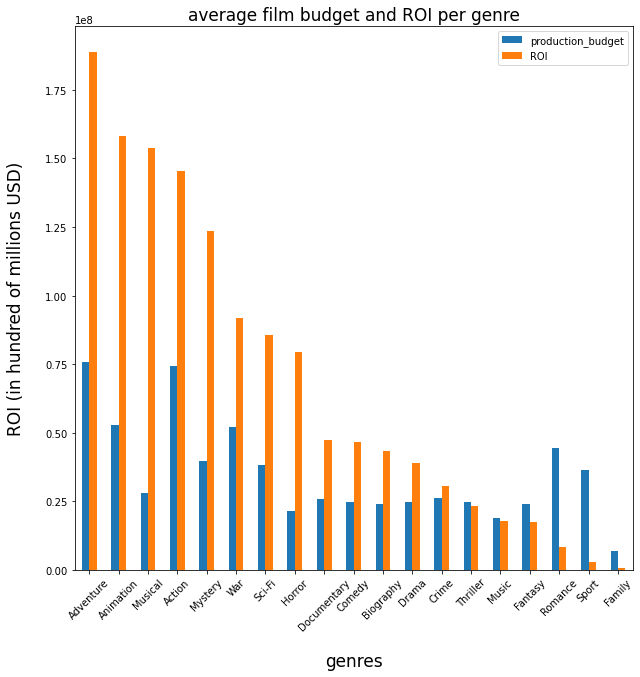

In [55]:
average_genre_ROI.plot.bar(x='genres', y=['production_budget', 'ROI'], figsize=(10,10))
plt.title('average film budget and ROI per genre', fontsize=17)
plt.ylabel('ROI (in hundred of millions USD)', labelpad=20, fontsize=17)
plt.xlabel('genres', labelpad=20, fontsize=17)
plt.xticks(rotation = 45)
plt.savefig('average_ROI_per_genre.png');

In [116]:
family_movies = filtered_df.loc[filtered_df['genres'] == 'Family']
family_movies

,release_month,title,production_budget,ROI,genres,director,release_month_name,genre
1412,2,Triangle,12000000,-10405045,Family,Yuka Matsushima,Feb,NaN
1662,8,Aberdeen,6500000,-6435852,Family,Ho-Cheung Pang,Aug,NaN
1777,10,Running Forever,5000000,-5000000,Family,Mike Mayhall,Oct,NaN
1846,4,Friday,3500000,24436778,Family,Lijin Jose,Apr,NaN


Hmm, we see some of these genres with only a handful of entries showing up in an important part of the 
 chart; musicals are looking similarly profitable to adventure, animation, and action movies and that
 may not necessarily be the case since there are only five of them vs. 188 adventure or 523 (!) action
 films. Nonetheless, we'll leave them here for now since we'll probably focus on more
 popular genres anyway.

Coming back to this, I want to drop the genres where you just have a handful of entries (specifically,
 less than ten) because it's just not enough information to make a reliable claim on. Maybe 20 or 22
 (for thriller & animation) isn't enough either, but I don't want to lose more data.

In [56]:
#average_genre_ROI.drop(average_genre_ROI['genres'] == ('Sci-Fi', 'Fantasy', 'Musical', 'Mystery',\
#                  'Music', 'Family', 'War'))
#average_genre_ROI.drop(average_genre_ROI['genres'].str.contains('Sci-Fi', 'Fantasy', 'Musical', 'Mystery', 'Music'))
#WHY IS THIS SO HARD?!?
#average_genre_ROI.drop(average_genre_ROI['genres'] == 'Sci-Fi')
#average_genre_ROI = average_genre_ROI[average_genre_ROI.genres != ('Sci-Fi', 'Fantasy', 'Musical', 'Mystery', 'Music', 'Family', 'War')]
#average_genre_ROI = average_genre_ROI[average_genre_ROI['genres'] != ('Sci-Fi', 'Fantasy', 'Musical', 'Mystery', 'Music', 'Family', 'War')]
average_genre_ROI = average_genre_ROI.drop(average_genre_ROI.index[average_genre_ROI['genres'] == 'Sci-Fi'])
average_genre_ROI = average_genre_ROI.drop(average_genre_ROI.index[average_genre_ROI['genres'] == 'Fantasy'])
average_genre_ROI = average_genre_ROI.drop(average_genre_ROI.index[average_genre_ROI['genres'] == 'Musical'])
average_genre_ROI = average_genre_ROI.drop(average_genre_ROI.index[average_genre_ROI['genres'] == 'Mystery'])
average_genre_ROI = average_genre_ROI.drop(average_genre_ROI.index[average_genre_ROI['genres'] == 'Music'])
average_genre_ROI = average_genre_ROI.drop(average_genre_ROI.index[average_genre_ROI['genres'] == 'Family'])
average_genre_ROI = average_genre_ROI.drop(average_genre_ROI.index[average_genre_ROI['genres'] == 'War'])
average_genre_ROI = average_genre_ROI.drop(average_genre_ROI.index[average_genre_ROI['genres'] == 'Sport'])
average_genre_ROI = average_genre_ROI.drop(average_genre_ROI.index[average_genre_ROI['genres'] == 'Thriller'])
average_genre_ROI = average_genre_ROI.drop(average_genre_ROI.index[average_genre_ROI['genres'] == 'Romance'])

#This took forever, I just had to remove them one-by-one in order to get it done rather than continue to 
# Google and try different things.
average_genre_ROI

,genres,release_month,production_budget,ROI
0,Adventure,7,75730761,188797095
1,Animation,9,52675000,158214897
3,Action,7,74318189,145259903
7,Horror,7,21612121,79303233
8,Documentary,7,25813187,47374097
9,Comedy,7,24858780,46506939
10,Biography,8,24102174,43313614
11,Drama,7,24625854,38855997
12,Crime,7,26024940,30639783


Ok, now let's reexamine genres with more than just a handful of records in our df:

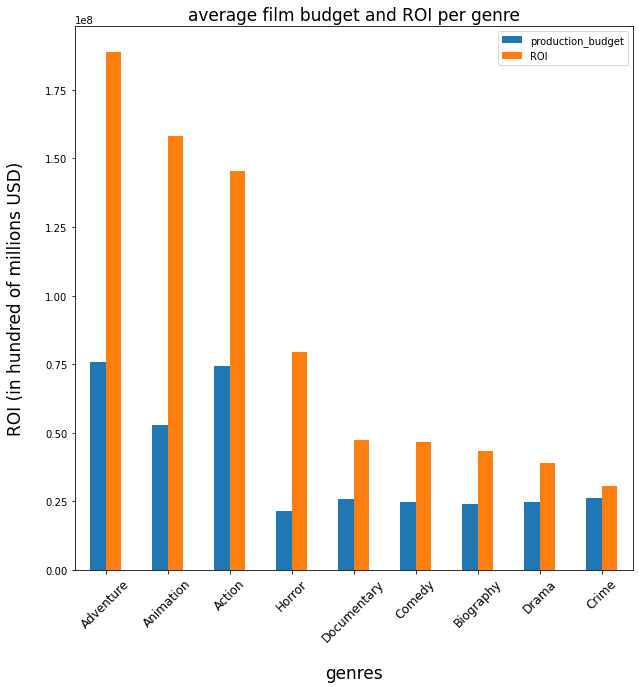

In [57]:
average_genre_ROI.plot.bar(x='genres', y=['production_budget', 'ROI'], figsize=(10,10))
plt.title('average film budget and ROI per genre', fontsize=17)
plt.ylabel('ROI (in hundred of millions USD)', labelpad=20, fontsize=17)
plt.xlabel('genres', labelpad=20, fontsize=17)
plt.xticks(rotation = 45, fontsize=12)
plt.savefig('average_ROI_per_genre.png');

Now let's consider genres and their respective average release month:

In [58]:
average_genre_month = filtered_df.groupby('genres').mean().sort_values('ROI', ascending=False)

In [59]:
average_genre_month

,release_month,production_budget,ROI
genres,,,
Adventure,7,75730761,188797095
Animation,9,52675000,158214897
Musical,6,28100000,153682199
Action,7,74318189,145259903
Mystery,5,39800000,123657278
War,5,52000000,91974226
Sci-Fi,6,38142857,85494944
Horror,7,21612121,79303233
Documentary,7,25813187,47374097


Before going further, I want to change the month values back to strings like I did earlier
 with the average_genre_ROI df for graphing purposes. 

In [60]:
filtered_df['release_month_name'] = pd.to_datetime(filtered_df['release_month'], format='%m').dt.month_name().str.slice(stop=3)


<ipython-input-60-8ed8790d5e5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_month_name'] = pd.to_datetime(filtered_df['release_month'], format='%m').dt.month_name().str.slice(stop=3)


In [61]:
filtered_df

,release_month,title,production_budget,ROI,genres,director,release_month_name
0,12,Avatar,425000000,2351345279,Horror,Atsushi Wada,Dec
1,5,Pirates of the Caribbean: On Stranger Tides,410600000,635063875,Action,Rob Marshall,May
2,6,Dark Phoenix,350000000,-200237650,Action,Simon Kinberg,Jun
3,5,Avengers: Age of Ultron,330600000,1072413963,Action,Joss Whedon,May
4,4,Avengers: Infinity War,300000000,1748134200,Action,Anthony Russo,Apr
...,...,...,...,...,...,...,...
1944,12,Christmas Mail,2500000,-2500000,Comedy,John Murlowski,Dec
1945,7,Stung,2500000,-2500000,Action,Benni Diez,Jul
1946,10,8 Days,2500000,-2500000,Drama,Jaco Booyens,Oct
1947,9,Antibirth,2500000,-2500000,Horror,Danny Perez,Sep


Ok, it looks like most genres tend to be released between May and July, which I suppose
 isn't surprising, since that's when they tend to do well. I guess I've just verified 
 something we already knew (aka the summer blockbuster season). 

Nonetheless, I can now back up the following: if you want a positive ROI, make one of the 
 films in the top nine of the average_genre_ROI graph (so, Adventure through Crime) and 
 release it in its corresponding month from the above average_genre_month df, but that 
 doesn't seem all that insightful.

Maybe one thing I could do is break each genre down by release month and corresponding 
 ROI because all I really have right now is the AVERAGE month a genre's released in, not 
 necessarily the most profitable. 

Thinking this through, I would start by singling out, say, the Adventure column and then 
 looking at ROI per month. First, let's just isolate Adventure movies: 

In [62]:
adventure_movies = filtered_df.loc[filtered_df['genres'] == 'Adventure']

Ok, now let's break them all down by average ROI per release month:

In [63]:
filtered_df

,release_month,title,production_budget,ROI,genres,director,release_month_name
0,12,Avatar,425000000,2351345279,Horror,Atsushi Wada,Dec
1,5,Pirates of the Caribbean: On Stranger Tides,410600000,635063875,Action,Rob Marshall,May
2,6,Dark Phoenix,350000000,-200237650,Action,Simon Kinberg,Jun
3,5,Avengers: Age of Ultron,330600000,1072413963,Action,Joss Whedon,May
4,4,Avengers: Infinity War,300000000,1748134200,Action,Anthony Russo,Apr
...,...,...,...,...,...,...,...
1944,12,Christmas Mail,2500000,-2500000,Comedy,John Murlowski,Dec
1945,7,Stung,2500000,-2500000,Action,Benni Diez,Jul
1946,10,8 Days,2500000,-2500000,Drama,Jaco Booyens,Oct
1947,9,Antibirth,2500000,-2500000,Horror,Danny Perez,Sep


In [64]:
#adventure_ROI_by_month = adventure_movies.groupby('release_month').mean().sort_values('ROI', ascending=False)

#Huh, I had to reset_index because it was aggregating based on release_month and making that the
# index, which in turn prohibited me from doing this below, but I finally got it:
adventure_ROI_by_month = adventure_movies.groupby('release_month')['ROI'].mean().reset_index().sort_values('release_month')
adventure_ROI_by_month

,release_month,ROI
0,1,45671999
1,2,66463181
2,3,138189452
3,4,75843204
4,5,152598014
5,6,341637636
6,7,282424912
7,8,69735768
8,9,46769048
9,10,93098039


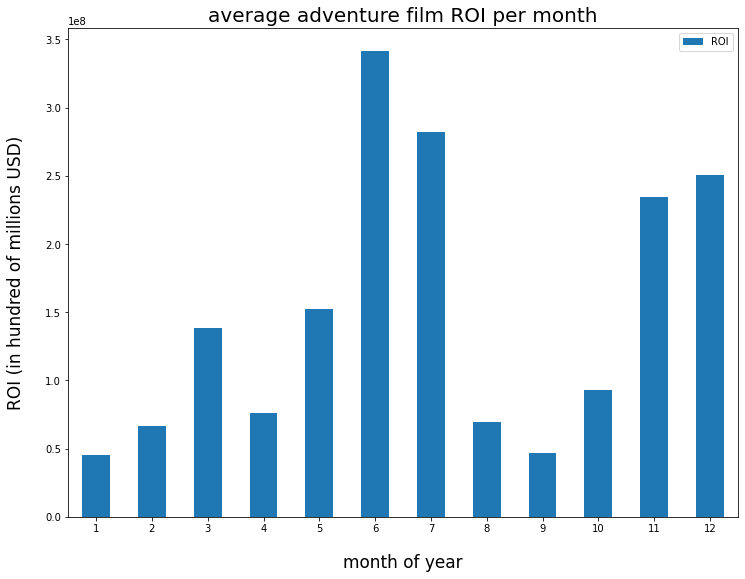

In [65]:
adventure_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='tab:blue', figsize=(12,9))
plt.title('average adventure film ROI per month', fontsize=20)
plt.xlabel('month of year', labelpad=20, fontsize=17)
plt.ylabel('ROI (in hundred of millions USD)', labelpad=20, fontsize=17)
plt.xticks(rotation = 0)
plt.savefig('average adventure film ROI per month.png');

Ok, NOW I can say if you want to make an adventure film, release it in June or July, but you 
 can also consider a November-December release. Now let's do the same for animation:

In [92]:
animation_movies = filtered_df.loc[filtered_df['genres'] == 'Animation']
animation_movies

,release_month,title,production_budget,ROI,genres,director,release_month_name,genre
71,4,The Jungle Book,175000000,787854547,Animation,Jun Falkenstein,Apr,NaN
160,3,Noah,130000000,222831065,Animation,John Stronach,Mar,NaN
165,5,Dinosaur,127500000,228648063,Animation,Jason Stamp,May,NaN
277,9,Hotel Transylvania,85000000,293505812,Animation,Genndy Tartakovsky,Sep,NaN
298,9,Hotel Transylvania 2,80000000,389500298,Animation,Genndy Tartakovsky,Sep,NaN
325,12,Sing,75000000,559454789,Animation,Garth Jennings,Dec,NaN
368,7,Despicable Me,69000000,474464573,Animation,Chris Renaud,Jul,NaN
582,12,Pinocchio,45000000,-13318189,Animation,Mark Gustafson,Dec,NaN
589,1,A Monster Calls,43000000,3414530,Animation,J.A. Bayona,Jan,NaN
665,10,Frankenweenie,39000000,42150788,Animation,Tim Burton,Oct,NaN


In [67]:
animation_ROI_by_month = animation_movies.groupby('release_month')['ROI'].mean().reset_index()
animation_ROI_by_month

,release_month,ROI
0,1,3414530
1,3,222831065
2,4,787854547
3,5,228648063
4,7,474464573
5,8,4949562
6,9,341503055
7,10,42150788
8,11,77177766
9,12,91295746


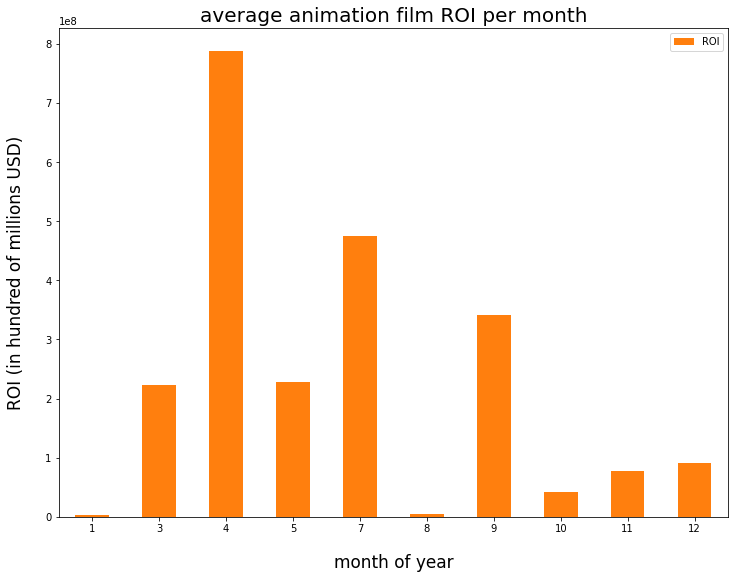

In [68]:
animation_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='tab:orange', figsize=(12,9))
plt.title('average animation film ROI per month', fontsize=20)
plt.xlabel('month of year', labelpad=20, fontsize=17)
plt.ylabel('ROI (in hundred of millions USD)', labelpad=20, fontsize=17)
plt.xticks(rotation = 0)
plt.savefig('average animation film ROI per month.png');

It looks like April is the most profitable month for animated movies. Now for action films:

In [69]:
action_movies = filtered_df.loc[filtered_df['genres'] == 'Action']
action_ROI_by_month = action_movies.groupby('release_month')['ROI'].mean().reset_index()
action_ROI_by_month

,release_month,ROI
0,1,56562754
1,2,125324557
2,3,133105481
3,4,212136118
4,5,290180152
5,6,241965774
6,7,170075488
7,8,81279670
8,9,53260824
9,10,82527306


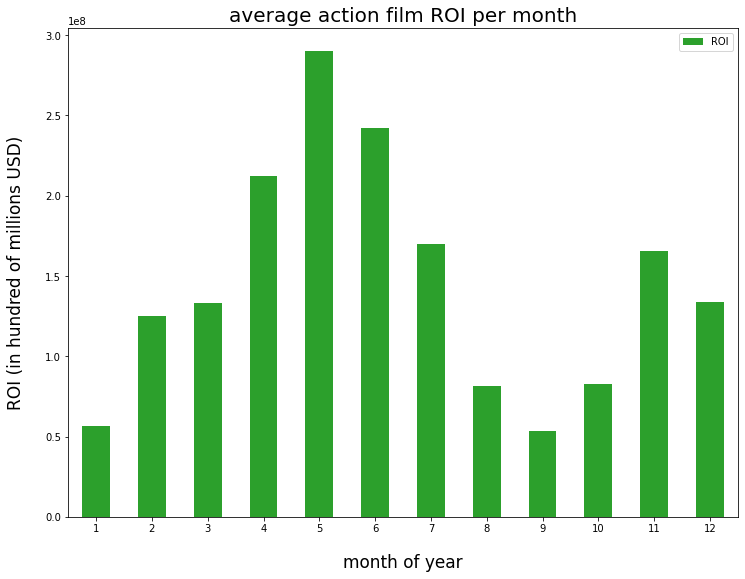

In [70]:
action_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='tab:green', figsize=(12,9))
plt.title('average action film ROI per month', fontsize=20)
plt.xlabel('month of year', labelpad=20, fontsize=17)
plt.ylabel('ROI (in hundred of millions USD)', labelpad=20, fontsize=17)
plt.xticks(rotation = 0)
plt.savefig('average action film ROI per month.png');

It looks like April-July are the most profitable months to release an action film with May 
 in the lead. Now for horror films:

In [71]:
horror_movies = filtered_df.loc[filtered_df['genres'] == 'Horror']
horror_ROI_by_month = horror_movies.groupby('release_month')['ROI'].mean().reset_index()
horror_ROI_by_month

,release_month,ROI
0,1,63280360
1,2,38982498
2,3,52199807
3,4,27112536
4,5,47321465
5,6,52513152
6,7,82594489
7,8,62866844
8,9,66638670
9,10,85334486


In [72]:
#horror_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='tab:red', figsize=(12,9))
#plt.title('average horror film ROI per month', fontsize=20)
#plt.xlabel('month of year', labelpad=20, fontsize=17)
#plt.ylabel('ROI (in hundred of millions USD)', labelpad=20, fontsize=17)
#plt.xticks(rotation = 0)
#plt.savefig('average horror film ROI per month.png');

I encountered a problem here that I fixed below and then came back and refreshed. Originally, the December
column in the above graph was huge, which seemed odd, so I looked further into these horror films:

In [73]:
horror_movies.sort_values('ROI', ascending=False)

,release_month,title,production_budget,ROI,genres,director,release_month_name
0,12,Avatar,425000000,2351345279,Horror,Atsushi Wada,Dec
703,9,It,35000000,662457969,Horror,Andy Muschietti,Sep
1053,7,The Conjuring,20000000,298000141,Horror,James Wan,Jul
1244,8,Annabelle: Creation,15000000,290384865,Horror,David F. Sandberg,Aug
1710,2,Get Out,5000000,250367951,Horror,Jordan Peele,Feb
...,...,...,...,...,...,...,...
1162,2,Left Behind,18500000,-14278659,Horror,Maksim Litvinov,Feb
1048,2,Velvet Buzzsaw,21000000,-21000000,Horror,Dan Gilroy,Feb
315,12,Nine,80000000,-26491142,Horror,Darren Lynch,Dec
576,7,Rebound,45000000,-27507986,Horror,Megan Freels Johnston,Jul


I saw at the top of the sliced df that this 2011 Japanese horror film also called Avatar somehow has the (massively) more popular 2009 Avatar's budget & ROI mixed in and it's throwing off the results. I can't seem to find this 2011 
version's ROI anywhere, so I'm tempted to drop it in the interest of time, but let's also make sure the actual 2009
Avatar is listed correctly in here; maybe I need to change the director on this row from Atsushi Wada to James Cameron.

In [74]:
Avatar = filtered_df[filtered_df['title'] == 'Avatar']
Avatar

,release_month,title,production_budget,ROI,genres,director,release_month_name
0,12,Avatar,425000000,2351345279,Horror,Atsushi Wada,Dec


Ok, so somehow the 2009 Avatar genre and director were mixed up with the 2011 version. Let's change that:

In [82]:
#filtered_df = filtered_df.iloc[0, ['genres']] = 'Adventure'
#filtered_df = filtered_df.at[6,'genre']='Adventure'
#filtered_df = filtered_df.set_value('0', 'genres', 'Adventure')
filtered_df.at[0,'genres']='Adventure'

In [85]:
filtered_df.at[0, 'director'] = 'James Cameron'
filtered_df.head(10)

,release_month,title,production_budget,ROI,genres,director,release_month_name,genre
0,12,Avatar,425000000,2351345279,Adventure,James Cameron,Dec,NaN
1,5,Pirates of the Caribbean: On Stranger Tides,410600000,635063875,Action,Rob Marshall,May,NaN
2,6,Dark Phoenix,350000000,-200237650,Action,Simon Kinberg,Jun,NaN
3,5,Avengers: Age of Ultron,330600000,1072413963,Action,Joss Whedon,May,NaN
4,4,Avengers: Infinity War,300000000,1748134200,Action,Anthony Russo,Apr,NaN
5,11,Justice League,300000000,355945209,Action,Zack Snyder,Nov,NaN
6,11,Spectre,300000000,579620923,Adventure,Sam Mendes,Nov,Adventure
7,7,The Dark Knight Rises,275000000,809439099,Action,Christopher Nolan,Jul,NaN
8,5,Solo: A Star Wars Story,275000000,118151347,Action,Ron Howard,May,NaN
9,7,The Lone Ranger,275000000,-14997885,Action,Gore Verbinski,Jul,NaN


In [87]:
filtered_df.at[6,'genres']='Action'

In [88]:
horror_movies

,release_month,title,production_budget,ROI,genres,director,release_month_name
238,5,Alien: Covenant,97000000,141521247,Horror,Ridley Scott,May
308,8,Conspiracy Theory,80000000,62783718,Horror,Jake Myers,Aug
315,12,Nine,80000000,-26491142,Horror,Darren Lynch,Dec
366,4,Next,70000000,3591500,Horror,Alyssa Baxter-Williams,Apr
449,12,Sabrina,58000000,29100000,Horror,Rocky Soraya,Dec
...,...,...,...,...,...,...,...
1882,8,Red River,3000000,6012000,Horror,Jacob Ennis,Aug
1901,9,Creature,3000000,-2669000,Horror,Fred Andrews,Sep
1910,10,Demonic,3000000,1668109,Horror,Will Canon,Oct
1932,10,Halloween II,2500000,23033818,Horror,Jay Conning,Oct


In [89]:
horror_ROI_by_month = horror_movies.groupby('release_month')['ROI'].mean().reset_index()
horror_ROI_by_month

,release_month,ROI
0,1,63280360
1,2,38982498
2,3,52199807
3,4,27112536
4,5,47321465
5,6,52513152
6,7,82594489
7,8,62866844
8,9,66638670
9,10,85334486


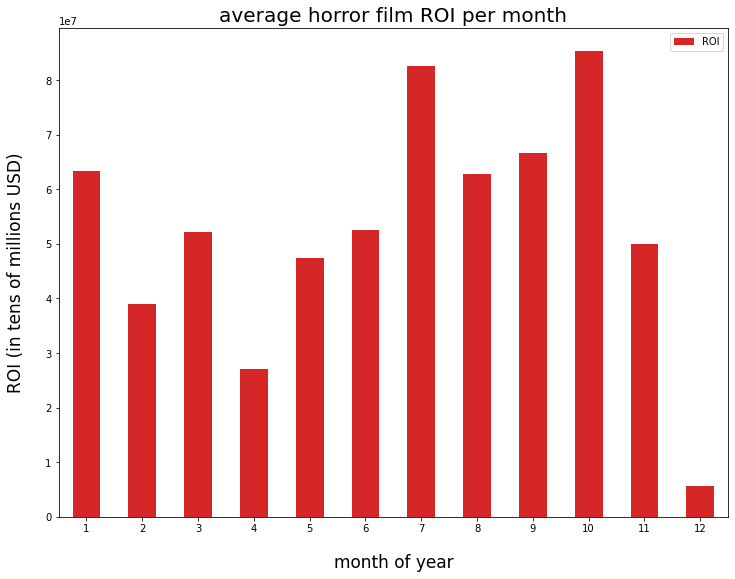

In [90]:
horror_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='tab:red', figsize=(12,9))
plt.title('average horror film ROI per month', fontsize=20)
plt.xlabel('month of year', labelpad=20, fontsize=17)
plt.ylabel('ROI (in tens of millions USD)', labelpad=20, fontsize=17)
plt.xticks(rotation = 0)
plt.savefig('average horror film ROI per month.png');

In [93]:
documentary_movies = filtered_df.loc[filtered_df['genres'] == 'Documentary']
documentary_ROI_by_month = documentary_movies.groupby('release_month')['ROI'].mean().reset_index()
documentary_ROI_by_month

,release_month,ROI
0,1,14693538
1,2,45018766
2,3,35457405
3,4,43854673
4,5,72121836
5,6,72760113
6,7,83567523
7,8,25490441
8,9,57978043
9,10,44411396


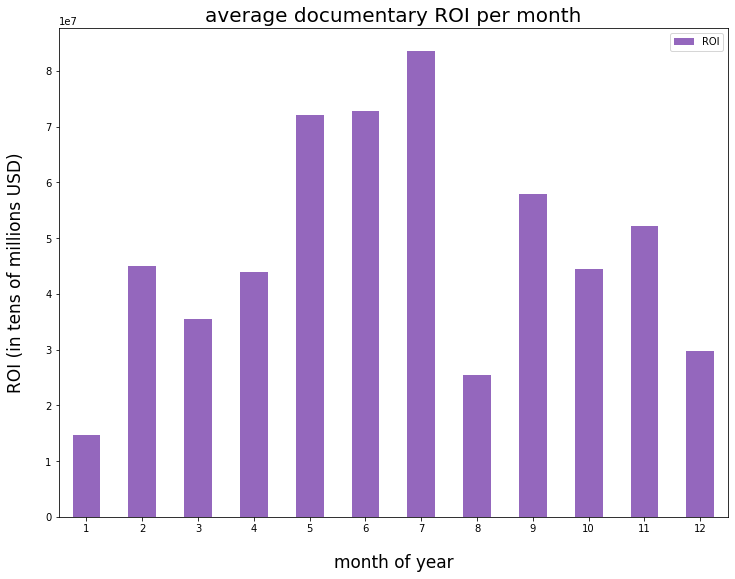

In [109]:
documentary_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='tab:purple', figsize=(12,9))
plt.title('average documentary ROI per month', fontsize=20)
plt.xlabel('month of year', labelpad=20, fontsize=17)
plt.ylabel('ROI (in tens of millions USD)', labelpad=20, fontsize=17)
plt.xticks(rotation = 0)
plt.savefig('average documentary ROI per month.png');

It looks like the summer blockbuster season largley applies to documentaries as well. Now for comedies:

In [95]:
comedy_movies = filtered_df.loc[filtered_df['genres'] == 'Comedy']
comedy_ROI_by_month = comedy_movies.groupby('release_month')['ROI'].mean().reset_index()
comedy_ROI_by_month

,release_month,ROI
0,1,42711100
1,2,41826856
2,3,37838873
3,4,32139542
4,5,81412573
5,6,67883737
6,7,58051651
7,8,38322357
8,9,21996004
9,10,11460056


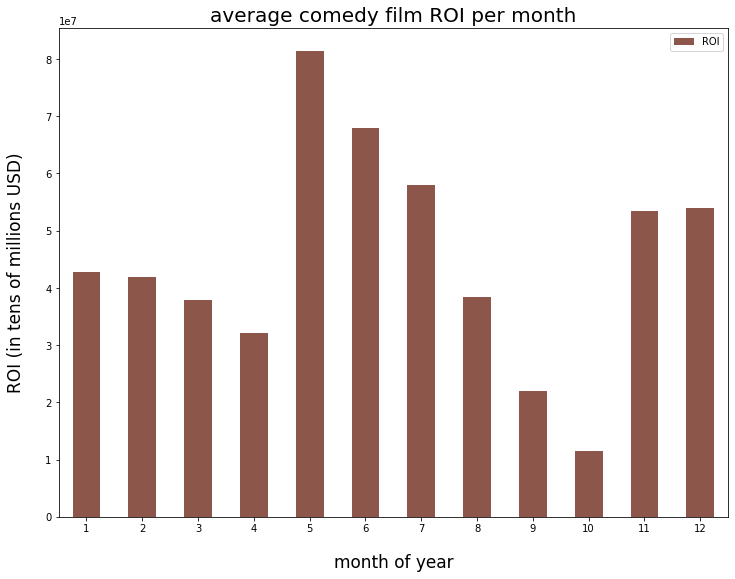

In [110]:
comedy_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='tab:brown', figsize=(12,9))
plt.title('average comedy film ROI per month', fontsize=20)
plt.xlabel('month of year', labelpad=20, fontsize=17)
plt.ylabel('ROI (in tens of millions USD)', labelpad=20, fontsize=17)
plt.xticks(rotation = 0)
plt.savefig('average comedy film ROI per month.png');

It looks like summer (as in May-July) also applies to comedies, but November-December too.
Now for biographies:

In [97]:
biography_movies = filtered_df.loc[filtered_df['genres'] == 'Biography']
biography_ROI_by_month = biography_movies.groupby('release_month')['ROI'].mean().reset_index()
biography_ROI_by_month

,release_month,ROI
0,1,42764053
1,2,27514896
2,3,13627924
3,4,16089594
4,5,905958
5,6,1818393
6,7,-19958125
7,8,53895349
8,9,12170942
9,10,42583084


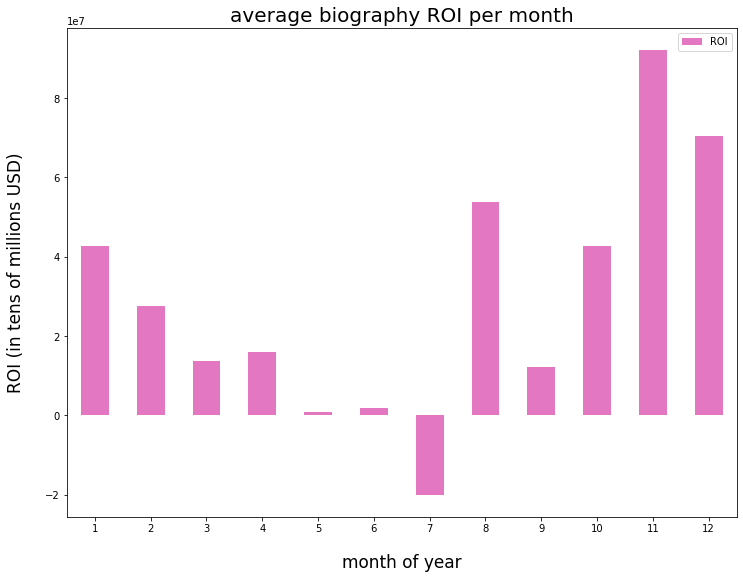

In [111]:
biography_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='tab:pink', figsize=(12,9))
plt.title('average biography ROI per month', fontsize=20)
plt.xlabel('month of year', labelpad=20, fontsize=17)
plt.ylabel('ROI (in tens of millions USD)', labelpad=20, fontsize=17)
plt.xticks(rotation = 0)
plt.savefig('average biography film ROI per month.png');

Looks like November is the clear standout for biographies. Don't release one in July! 
Now for dramas:

In [99]:
drama_movies = filtered_df.loc[filtered_df['genres'] == 'Drama']
drama_ROI_by_month = drama_movies.groupby('release_month')['ROI'].mean().reset_index()
drama_ROI_by_month

,release_month,ROI
0,1,11160429
1,2,81843420
2,3,51989352
3,4,15420716
4,5,16509292
5,6,53952978
6,7,70695811
7,8,30898954
8,9,4324445
9,10,33536078


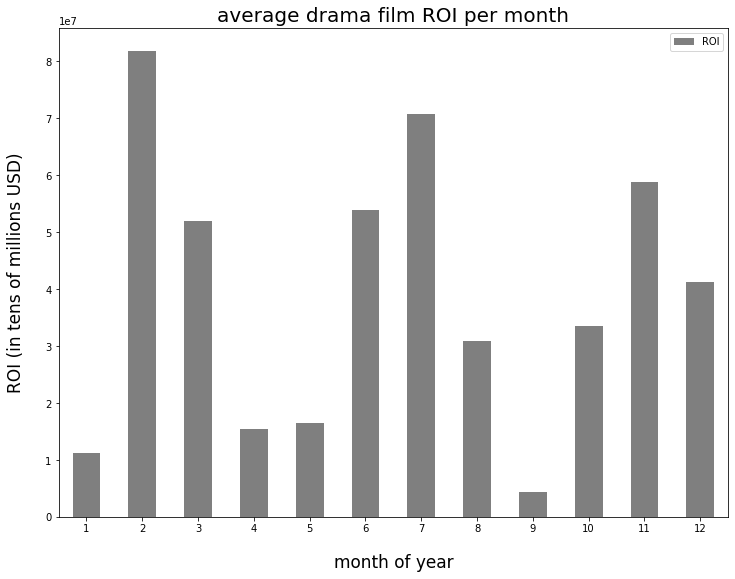

In [112]:
drama_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='tab:gray', figsize=(12,9))
plt.title('average drama film ROI per month', fontsize=20)
plt.xlabel('month of year', labelpad=20, fontsize=17)
plt.ylabel('ROI (in tens of millions USD)', labelpad=20, fontsize=17)
plt.xticks(rotation = 0)
plt.savefig('average drama film ROI per month.png');

This is a new pattern. It appears as if February is the best month for a strong-ROI drama release,
 then July, November, June and March. Now for crime films:

In [101]:
crime_movies = filtered_df.loc[filtered_df['genres'] == 'Crime']
crime_ROI_by_month = crime_movies.groupby('release_month')['ROI'].mean().reset_index()
crime_ROI_by_month

,release_month,ROI
0,1,6544167
1,2,1508179
2,3,65073070
3,4,-1500580
4,5,48356811
5,6,91164104
6,7,7187210
7,8,5298716
8,9,38577907
9,10,13023968


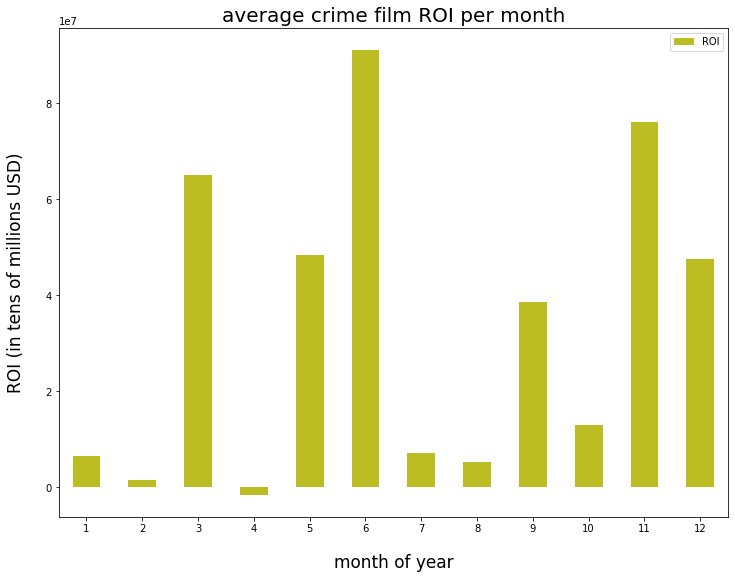

In [113]:
crime_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='tab:olive', figsize=(12,9))
plt.title('average crime film ROI per month', fontsize=20)
plt.xlabel('month of year', labelpad=20, fontsize=17)
plt.ylabel('ROI (in tens of millions USD)', labelpad=20, fontsize=17)
plt.xticks(rotation = 0)
plt.savefig('average crime film ROI per month.png');

Ok, that's all the profit-turning genres. Now let's see who's directing these high-ROI films. I 
 suppose the question is whether to take a broad approach and see who directs these profitable 
 films overall or to break it down by genre. Let's start with a big picture just to see. 
 Specifically, let's look at the average ROI each director has made:

In [103]:
#directors_by_ROI = filtered_df.groupby('director').mean().sort_values('ROI', ascending=False)

directors_by_ROI = filtered_df.groupby('director')['ROI'].mean().reset_index().sort_values('ROI', ascending=False)
print('number of directors in this list:', len(directors_by_ROI))
print('\n')
print(directors_by_ROI.head(100).to_string())

number of directors in this list: 1432


                 director        ROI
501         James Cameron 2351345279
1009           Pete Meads 2008208395
226       Colin Trevorrow 1433854864
1151         Ryan Coogler 1148258224
3              Adam Green 1122469910
81          Anthony Russo 1060868501
737            Kyle Balda 1023031962
519             James Wan  871205858
209       Christophe Gans  843815419
1414        Yarrow Cheney  811750534
669           Joss Whedon  784645092
760           Lee Unkrich  745943812
1165           Sam Mendes  745073952
1312           Tim Miller  743025593
1017        Peter Jackson  724316015
94       Artie Mandelberg  679235992
627           Jon Favreau  679035628
994         Patty Jenkins  671133378
68        Andy Muschietti  662457969
304           David Slade  638102828
165          Byron Howard  597953428
216     Christopher Nolan  584045121
38         Alfonso Cuarón  583698673
1107     Robert Stromberg  578536735
857           Michael Bay  5659995

I don't really know directors all that well, so I Googled some of these folks and they are in fact
 directors (but sometimes also producers) of successful films, so this looks legitimate. However, 
 this is a list of 1,432 directors, so let's break them down. 
 
 I think my project is largely veering
 down a genre-oriented path, so let's regroup them that way. Thinking through this, I specifically
 want to see, say, the top ROI directors per genre, so genre --> directors --> top 10 ROI-earners.
 
 This proved to be tricky, here's where I found out how to do this: https://sparkbyexamples.com/pandas/pandas-sort-dataframe-by-multiple-columns/#:~:text=You%20can%20sort%20pandas%20DataFrame,descending%20and%20True%20for%20ascending.

In [104]:
#directors_by_genre = filtered_df.groupby(['genres', 'director']).size()
#directors_by_genre = filtered_df.groupby(['genres', 'director', 'ROI']).size()
directors_by_genre = filtered_df.groupby(['genres', 'director']).agg({'ROI': sum}).reset_index()
directors_by_genre

,genres,director,ROI
0,Action,Adam McKay,70936470
1,Action,Akiva Schaffer,12130045
2,Action,Alan Taylor,494602516
3,Action,Albert Hughes,78750817
4,Action,Alejandro G. Iñárritu,397938302
...,...,...,...
1650,Thriller,Vladimir V. Feyer,31931658
1651,Thriller,Youssef Delara,-3000000
1652,War,Adam Starks,-9800895
1653,War,Jared Chandler,140023573


In [105]:
#directors_by_genre.sort_values(by='ROI', ascending=False)
directors_by_genre = directors_by_genre.sort_values(['genres','ROI'], ascending=[True,False])

In [106]:
print(directors_by_genre.to_string())

           genres                          director        ROI
18         Action                     Anthony Russo 3182605502
189        Action                       Joss Whedon 2353935276
147        Action                         James Wan 2315617434
233        Action                       Michael Bay 2263998250
109        Action                  Francis Lawrence 1942381826
56         Action                 Christopher Nolan 1834801109
315        Action                        Sam Mendes 1490147904
373        Action                       Zack Snyder 1470920114
114        Action                    Gareth Edwards 1469178925
61         Action                   Colin Trevorrow 1433854864
83         Action                      Dean DeBlois 1189715545
311        Action                      Ryan Coogler 1148258224
136        Action                       J.A. Bayona 1135772799
329        Action                       Shane Black 1096476582
32         Action                         Brad Bird 107

Ok, now I have a multi-indexed df of genres --> directors --> sorted by ROI. I will use this
 to copy-from-and-paste-to a list of the top ten directors to attempt to recruit per genre
 alongside the release-month graphs per genre in my presentation. 